## Занятие 8. Нелинейные модели для классификации. Выбор лучшей модели для классификации. Построение программного конвеера

In [34]:
import os
import numpy as np
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

### k-Nearest Neighbors

In [14]:
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

In [15]:
# load dataset
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

In [16]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [17]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

In [18]:
# KNN Classification
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())
print(results.std())

0.7109876965140123
0.0507915093681296


In [19]:
model.fit(X,Y)

KNeighborsClassifier()

In [22]:
x_new=np.array([[0,136,42,34,136,43,2,32],[0,137,40,35,168,43.1,2.288,33]])

In [23]:
model.predict(x_new)

array([0., 1.])

In [24]:
model.predict_proba(x_new)

array([[0.6, 0.4],
       [0.4, 0.6]])

### Naive Bayes

https://scikit-learn.org/stable/modules/naive_bayes.html

In [26]:
# Gaussian Naive Bayes Classification
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7591421736158578


In [27]:
model.fit(X,Y)

GaussianNB()

In [28]:
model.predict(x_new)

array([1., 1.])

In [33]:
model.predict_proba(x_new)

array([[2.78430103e-03, 9.97215699e-01],
       [2.16502287e-04, 9.99783498e-01]])

### Classification and Regression Trees

In [36]:
# CART Classification
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6967703349282297


In [37]:
model.fit(X,Y)

DecisionTreeClassifier()

In [38]:
model.predict(x_new)

array([1., 1.])

In [39]:
model.predict_proba(x_new)

array([[0., 1.],
       [0., 1.]])

## Выбор лучшего алгоритма машинного обучения для задачи классификации

In [9]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [10]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.688961 (0.051639)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


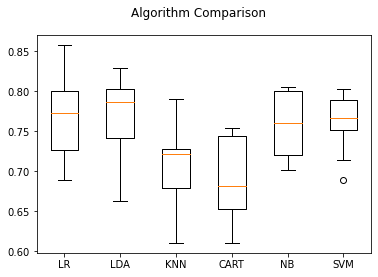

In [11]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Создание пайплайна (программного конвеера)

### Программный конвеер для подготовки данных и моделирования

In [12]:
# Create a pipeline that standardizes the data then creates a model
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)

In [13]:
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7669685577580315


### Программный конвеер для отбора признаков и моделирования

In [14]:
# Create a pipeline that extracts features from the data then creates a model
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

In [15]:
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(solver='liblinear')))
model = Pipeline(estimators)

In [16]:
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7721633629528366
